#### Unicorn Companies
- Private companies with a valuation over $1 billion as of March 2022, including each company's current valuation, funding, country of origin, industry, select investors, and the years they were founded and became unicorns.

##### Recommended Analysis
1. Which unicorn compnies have the biggest return on investment?
2. How long does it usually take for a company to become a unicorn? Has it always been this way?
3. Which countries have the most unicorns? Are there cities that appear to be industry hubs?
4. Which investors have funded the most unicorns?

In [37]:
# import necessary libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# Load and read the dataset

unicorn_data = pd.read_csv(r'C:\Users\kemia\OneDrive\Quantum Bootcamp\Unicorn_Companies.csv')
unicorn_data

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,07/04/2017,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,01/12/2012,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,03/07/2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,23/01/2014,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/2011,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,29/06/2017,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,18/04/2017,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,06/05/2021,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,19/10/2021,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


#### Exploratory Data Analysis

In [39]:
# Checking the shape of the data
unicorn_data.shape

(1074, 10)

In [40]:
# check the columns

unicorn_data.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

In [41]:
# check the data types of the columns

unicorn_data.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [42]:
unicorn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [43]:
# check if there are missing values #isna(), # isnull()

unicorn_data.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

#### Observation
- The city is having 16 missing values and one value missing from the select investors. 

In [44]:
unicorn_data

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,07/04/2017,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,01/12/2012,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,03/07/2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,23/01/2014,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/2011,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,29/06/2017,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,18/04/2017,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,06/05/2021,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,19/10/2021,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


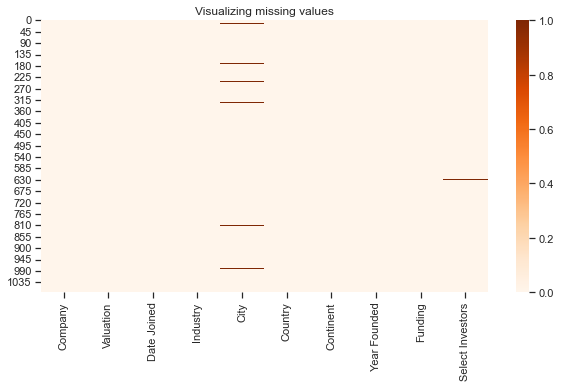

In [45]:
# visualize the missing values
plt.figure(figsize = (10, 5))
plt.title('Visualizing missing values')
sns.heatmap(unicorn_data.isnull(), cbar = True, cmap = 'Oranges')
plt.show()

In [46]:

# Converting the valuation and funding into their actual figures and removing strings '$'


def convert_to_numeric(value):
    """
    Convert string values with 'B', 'M', etc., into numeric values.
    """
    if isinstance(value, str):
        value = value.replace('$', '')
        if 'B' in value:
            return float(value.replace('B', '')) * 1e9
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
        elif value.isnumeric() or any(char in ['.', '-'] for char in value):
            return float(value)
        else:
            return np.nan
    else:
        return value  # return the value as is if it's already a number

# Apply the conversion function to the 'Valuation' and 'Funding' columns
unicorn_data['Valuation'] = unicorn_data['Valuation'].apply(convert_to_numeric)
unicorn_data['Funding'] = unicorn_data['Funding'].apply(convert_to_numeric)

# Print the cleaned and converted DataFrame
print(unicorn_data)


          Company     Valuation Date Joined                         Industry  \
0       Bytedance  1.800000e+11  07/04/2017          Artificial intelligence   
1          SpaceX  1.000000e+11  01/12/2012                            Other   
2           SHEIN  1.000000e+11  03/07/2018  E-commerce & direct-to-consumer   
3          Stripe  9.500000e+10  23/01/2014                          Fintech   
4          Klarna  4.600000e+10  12/12/2011                          Fintech   
...           ...           ...         ...                              ...   
1069     Zhaogang  1.000000e+09  29/06/2017  E-commerce & direct-to-consumer   
1070  Zhuan Zhuan  1.000000e+09  18/04/2017  E-commerce & direct-to-consumer   
1071     Zihaiguo  1.000000e+09  06/05/2021                Consumer & retail   
1072         Zopa  1.000000e+09  19/10/2021                          Fintech   
1073        Zwift  1.000000e+09  16/09/2020  E-commerce & direct-to-consumer   

               City         Country    

In [47]:
# Calculating Companies with highest ROI

# Apply the function to 'Valuation' and 'Funding' columns
unicorn_data['Valuation'] = unicorn_data['Valuation'].apply(convert_to_numeric)
unicorn_data['Funding'] = unicorn_data['Funding'].apply(convert_to_numeric)

# Compute ROI
unicorn_data['ROI'] = ((unicorn_data['Valuation'] / unicorn_data['Funding']) - 1) * 100

# Handle inf and NaN values that result from division by zero or other irregularities
unicorn_data['ROI'] = unicorn_data['ROI'].replace([np.inf, -np.inf], np.nan)

# Find the companies with the highest ROIs
top_roi_companies = unicorn_data.nlargest(10, 'ROI')

# Print the companies with the highest ROIs
print(top_roi_companies[['Company', 'ROI']])

                    Company            ROI
239                  Zapier  399900.000000
61                   Dunamu   12576.056338
792               Workhuman   11011.111111
361                    CFGI   10426.315789
743                  Manner    9900.000000
72          DJI Innovations    7519.047619
760             GalaxySpace    7042.857143
5                     Canva    6893.006993
368              Il Makiage    6796.551724
1012  Revolution Precrafted    6566.666667


### Observation
1. The Zapier company has the highest ROI amnongst the top 10 companies. There is a wide gap between the first and the last company, and if there is a continous investment in the Zapier company, more ROI would be greater. However, other companies can leverage on the success of Zapier to improve on there ROI.


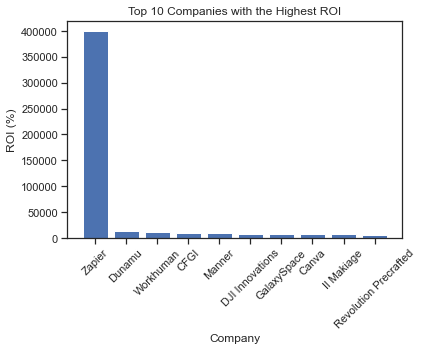

In [48]:
# Apply the function to 'Valuation' and 'Funding' columns
unicorn_data['Valuation'] = unicorn_data['Valuation'].apply(convert_to_numeric)
unicorn_data['Funding'] = unicorn_data['Funding'].apply(convert_to_numeric)

# Compute ROI
unicorn_data['ROI'] = ((unicorn_data['Valuation'] / unicorn_data['Funding']) - 1) * 100

# Handle inf and NaN values that result from division by zero or other irregularities
unicorn_data['ROI'] = unicorn_data['ROI'].replace([np.inf, -np.inf], np.nan)

# Find the companies with the highest ROIs
top_roi_companies = unicorn_data.nlargest(10, 'ROI')

# Plotting the bar chart
plt.bar(top_roi_companies['Company'], top_roi_companies['ROI'])
plt.xlabel('Company')
plt.ylabel('ROI (%)')
plt.title('Top 10 Companies with the Highest ROI')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

#### Univariate Analysis

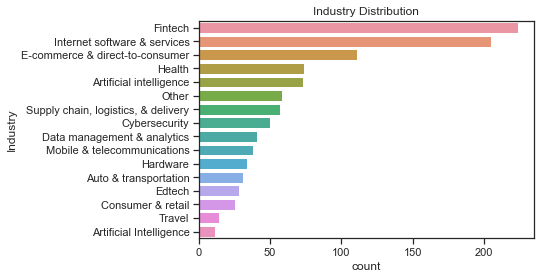

In [49]:
# Bar plot for Industry 
sns.countplot(y=unicorn_data['Industry'], order=unicorn_data['Industry'].value_counts().index)
plt.title('Industry Distribution')
plt.show()


### Observation
1. The Fintech industry are more while the artificial intelligence are the least. It could be shown that investors are would provide more funds in expanding Fintech companies for it to maintain its dominance.

C:\Users\kemia\AppData\Local\Temp\ipykernel_32784\542091907.py:2: UserWarning: Parsing '23/01/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  unicorn_data['Join Year'] = pd.to_datetime(unicorn_data['Date Joined']).dt.year
C:\Users\kemia\AppData\Local\Temp\ipykernel_32784\542091907.py:2: UserWarning: Parsing '30/12/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  unicorn_data['Join Year'] = pd.to_datetime(unicorn_data['Date Joined']).dt.year
C:\Users\kemia\AppData\Local\Temp\ipykernel_32784\542091907.py:2: UserWarning: Parsing '20/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  unicorn_data['Join Year'] = pd.to_datetime(unicorn_data['Date Joined']).dt.year
C:\Users\kemia\AppData\Local\Temp\ipykernel_32784\542091907.py:2: UserWarning: Parsing '26/04/2018' in DD/MM/YYYY format. Provide format or specify infer_dat

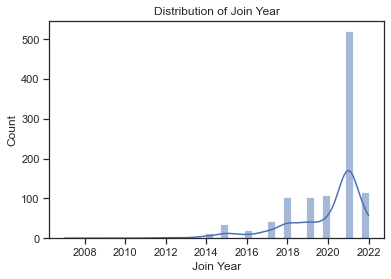

In [50]:
# For 'Date Joined', extract the year and plot a histogram
unicorn_data['Join Year'] = pd.to_datetime(unicorn_data['Date Joined']).dt.year
sns.histplot(unicorn_data['Join Year'], kde=True)
plt.title('Distribution of Join Year')
plt.show()

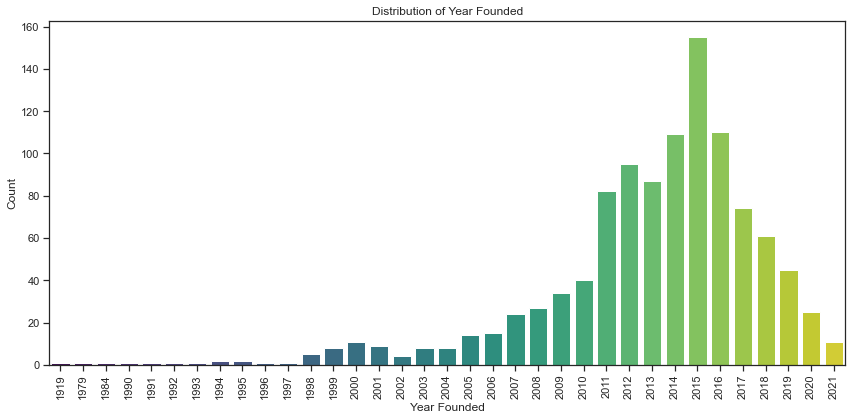

In [51]:

# Count plot for Year Founded
plt.figure(figsize=(12, 6))
sns.countplot(x='Year Founded', data=unicorn_data, palette='viridis')
plt.title('Distribution of Year Founded')
plt.xlabel('Year Founded')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()



### Observation
#### The surge in the establishment of companies was between 2011 and 2018.

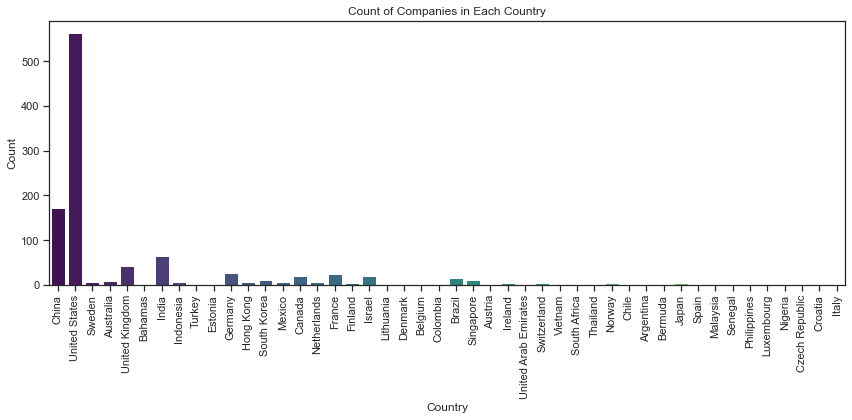

In [52]:
# Count plot for Countries
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=unicorn_data, palette='viridis')
plt.title('Count of Companies in Each Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


### Observation

The United States, China, United Kingdom and India accounted for high numbers of companies, while Germany, Canada, France, Isreal and Brazil are countries with up coming increase in companies. 

It shows from this analysis that companies thrive more in developed countries than developing countries. There are potentials for companies to thrive in developing countries (India, Brazil) which might be areas for future investment.

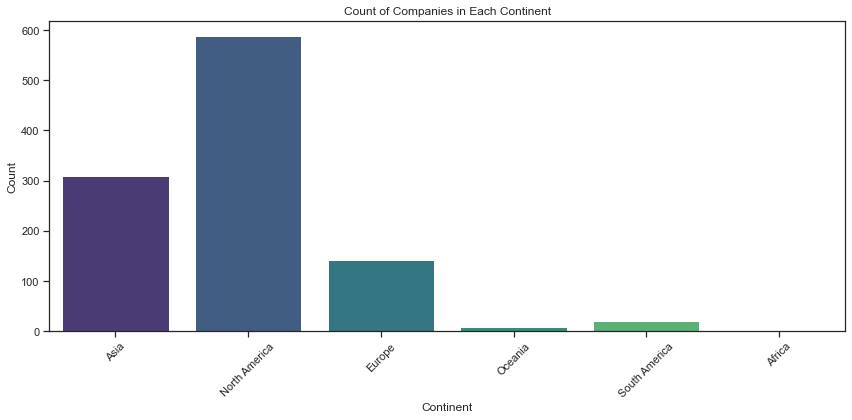

In [53]:
# Count plot for Continents
plt.figure(figsize=(12, 6))
sns.countplot(x='Continent', data=unicorn_data, palette='viridis')
plt.title('Count of Companies in Each Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


### Observation

The continent of North America, Asia and Europe dominated in the number of companies, while Africa is really on the lower ebb. 

It shows that there is need to leapfrog Africa and Oceania for more companies establishment.

### Multivariate Analysis

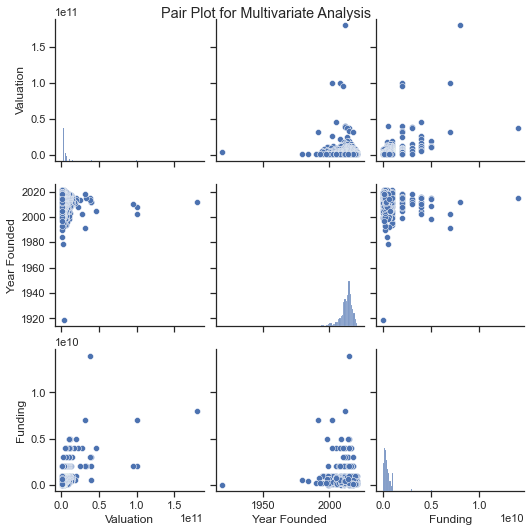

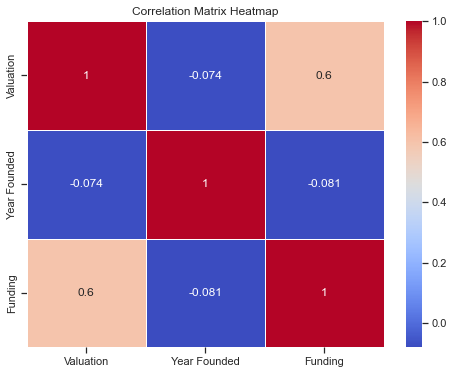

In [54]:
# Select the columns for multivariate analysis
selected_columns = ['Valuation', 'Year Founded', 'Funding']

# Create a pair plot to visualize relationships between selected variables
sns.pairplot(unicorn_data[selected_columns])
plt.suptitle("Pair Plot for Multivariate Analysis")
plt.show()

# Create a correlation matrix to quantify relationships
correlation_matrix = unicorn_data[selected_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


### Observation

For any company to thrive, there is a relationship between funding and valuation. More funding of the company would increase its valuation.

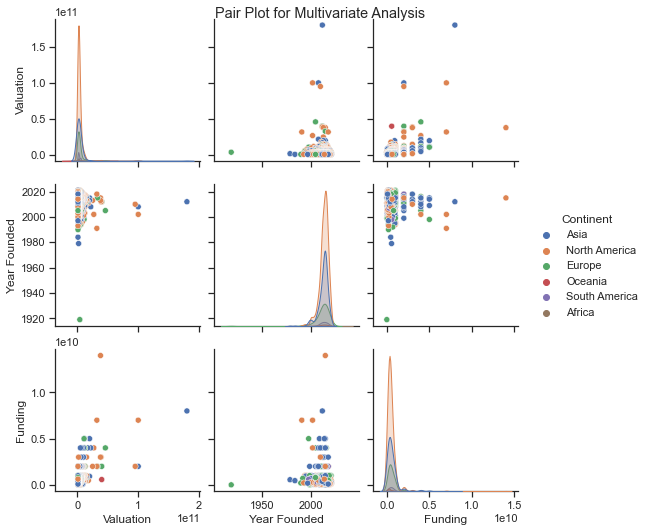

In [55]:

# Select the columns for multivariate analysis
selected_columns = ['Valuation', 'Year Founded', 'Funding', 'Continent']

# Scatter plot matrix for selected variables
sns.set(style="ticks")
sns.pairplot(unicorn_data[selected_columns], hue="Continent")
plt.suptitle("Pair Plot for Multivariate Analysis")
plt.show()



In [56]:
data = unicorn_data.copy()

In [57]:
data

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,ROI,Join Year
0,Bytedance,1.800000e+11,07/04/2017,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",2150.000000,2017
1,SpaceX,1.000000e+11,01/12/2012,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",1328.571429,2012
2,SHEIN,1.000000e+11,03/07/2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",4900.000000,2018
3,Stripe,9.500000e+10,23/01/2014,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4650.000000,2014
4,Klarna,4.600000e+10,12/12/2011,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",1050.000000,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,1.000000e+09,29/06/2017,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,3.790000e+08,"K2 Ventures, Matrix Partners China, IDG Capital",163.852243,2017
1070,Zhuan Zhuan,1.000000e+09,18/04/2017,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,9.900000e+08,"58.com, Tencent Holdings",1.010101,2017
1071,Zihaiguo,1.000000e+09,06/05/2021,Consumer & retail,Chongqing,China,Asia,2018,8.000000e+07,"Xingwang Investment Management, China Capital ...",1150.000000,2021
1072,Zopa,1.000000e+09,19/10/2021,Fintech,London,United Kingdom,Europe,2005,7.920000e+08,"IAG Capital Partners, Augmentum Fintech, North...",26.262626,2021


In [58]:
# Convert the 'Date Joined' column to a datetime format
data['Date Joined'] = pd.to_datetime(data['Date Joined'])

# Extract the year from 'Date Joined'
data['Year Joined'] = data['Date Joined'].dt.year

C:\Users\kemia\AppData\Local\Temp\ipykernel_32784\1527975750.py:2: UserWarning: Parsing '23/01/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date Joined'] = pd.to_datetime(data['Date Joined'])
C:\Users\kemia\AppData\Local\Temp\ipykernel_32784\1527975750.py:2: UserWarning: Parsing '30/12/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date Joined'] = pd.to_datetime(data['Date Joined'])
C:\Users\kemia\AppData\Local\Temp\ipykernel_32784\1527975750.py:2: UserWarning: Parsing '20/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date Joined'] = pd.to_datetime(data['Date Joined'])
C:\Users\kemia\AppData\Local\Temp\ipykernel_32784\1527975750.py:2: UserWarning: Parsing '26/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date Joined'

In [59]:

# Assuming you already have the unicorn_data DataFrame

# Create an empty list to store the calculated years
years_to_unicorn = []

# Iterate through each row in the DataFrame
for index, row in data.iterrows():
    years_to_unicorn.append(row['Year Joined'] - row['Year Founded'])

# Create a new column in the DataFrame for years to unicorn
data['Years to Unicorn'] = years_to_unicorn

# Display the resulting DataFrame with the new column
print(data)


          Company     Valuation Date Joined                         Industry  \
0       Bytedance  1.800000e+11  2017-07-04          Artificial intelligence   
1          SpaceX  1.000000e+11  2012-01-12                            Other   
2           SHEIN  1.000000e+11  2018-03-07  E-commerce & direct-to-consumer   
3          Stripe  9.500000e+10  2014-01-23                          Fintech   
4          Klarna  4.600000e+10  2011-12-12                          Fintech   
...           ...           ...         ...                              ...   
1069     Zhaogang  1.000000e+09  2017-06-29  E-commerce & direct-to-consumer   
1070  Zhuan Zhuan  1.000000e+09  2017-04-18  E-commerce & direct-to-consumer   
1071     Zihaiguo  1.000000e+09  2021-06-05                Consumer & retail   
1072         Zopa  1.000000e+09  2021-10-19                          Fintech   
1073        Zwift  1.000000e+09  2020-09-16  E-commerce & direct-to-consumer   

               City         Country    

### Observation

The year that companies joined does not determine how long it take them in becoming a unicorn. 

In [60]:

# Assuming you already have the unicorn_data DataFrame with the 'Years to Unicorn' column

# Create a new DataFrame with 'Company' and 'Years to Unicorn' columns
company_years_table = data[['Company', 'Years to Unicorn']]

# Display the table
company_years_table


,Company,Years to Unicorn
0,Bytedance,5
1,SpaceX,10
2,SHEIN,10
3,Stripe,4
4,Klarna,6
...,...,...
1069,Zhaogang,5
1070,Zhuan Zhuan,2
1071,Zihaiguo,3
1072,Zopa,16


In [61]:
company_years_table.describe()

,Years to Unicorn
count,1074.000000
mean,7.000931
std,5.329672
min,-4.000000
25%,4.000000
50%,6.000000
75%,9.000000
max,98.000000


#### Observation
For any company to become a Unicorn, it would take an average of 7 years to achieve

In [62]:
# Top Countries with Unicorn companies

# Group the DataFrame by 'Country' and count the number of unique companies in each group
unicorn_count_by_country = data.groupby('Country')['Company'].nunique()

# Sort the results in descending order to find countries with the most unicorns
top_countries_with_unicorns = unicorn_count_by_country.sort_values(ascending=False)

# Display the top countries with the most unicorns
print(top_countries_with_unicorns)


Country
United States           562
China                   173
India                    65
United Kingdom           43
Germany                  26
France                   24
Israel                   20
Canada                   19
Brazil                   16
South Korea              12
Singapore                12
Australia                 8
Netherlands               6
Mexico                    6
Hong Kong                 6
Sweden                    6
Indonesia                 6
Japan                     5
Ireland                   5
Switzerland               5
Norway                    4
Finland                   4
Spain                     3
United Arab Emirates      3
Turkey                    3
Belgium                   3
Thailand                  2
Chile                     2
South Africa              2
Colombia                  2
Estonia                   2
Denmark                   2
Philippines               2
Austria                   2
Vietnam                   2
Argentina   

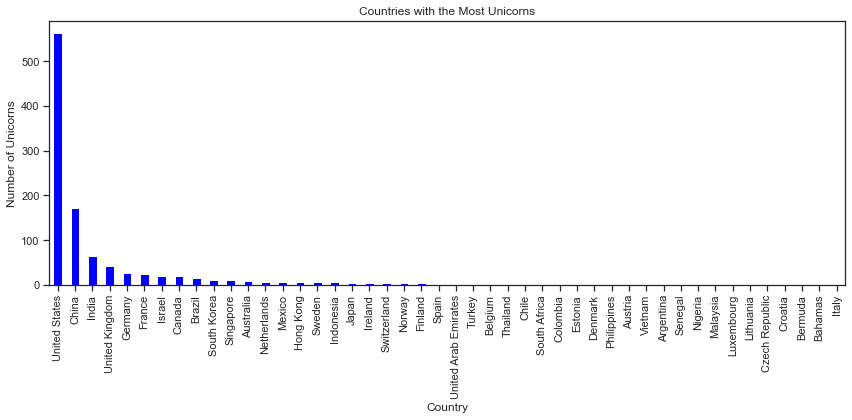

In [63]:
# Visual display of countries with most unicorns

# Assuming you already have the 'top_countries_with_unicorns' DataFrame

# Create a bar chart
plt.figure(figsize=(12, 6))
top_countries_with_unicorns.plot(kind='bar', color='blue')
plt.title('Countries with the Most Unicorns')
plt.xlabel('Country')
plt.ylabel('Number of Unicorns')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


In [64]:
# Group the DataFrame by 'Continent' and count the number of unique companies in each group
unicorn_count_by_continent = data.groupby('Continent')['Company'].nunique()

# Sort the results in descending order to find countries with the most unicorns
top_continent_with_unicorns = unicorn_count_by_continent.sort_values(ascending=False)

# Display the top countries with the most unicorns
print(top_continent_with_unicorns)


Continent
North America    589
Asia             310
Europe           143
South America     21
Oceania            8
Africa             3
Name: Company, dtype: int64


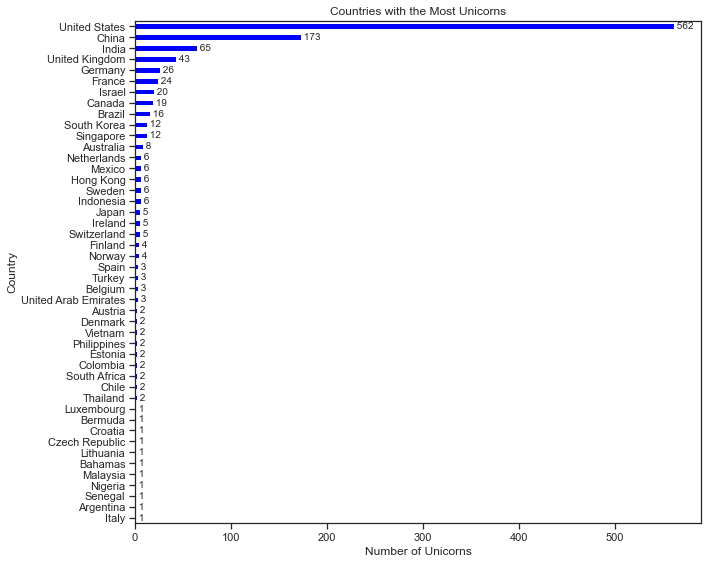

In [65]:

# Assuming you already have the 'top_countries_with_unicorns' DataFrame

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
top_countries_with_unicorns.sort_values().plot(kind='barh', color='blue')

# Display the actual values on the bars
for index, value in enumerate(top_countries_with_unicorns.sort_values()):
    plt.text(value, index, f' {value}', va='center', fontsize=10)

plt.title('Countries with the Most Unicorns')
plt.xlabel('Number of Unicorns')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


In [69]:

# Assuming you have a DataFrame called unicorn_data with the columns: 'Company', 'Select Investors', 'Funding'

# Split the 'Select Investors' column by comma and create a new row for each investor
data['Select Investors'] = data['Select Investors'].str.split(', ')
data = data.explode('Select Investors')

# Group the DataFrame by 'Select Investors' and calculate the total funding
investor_funding = data.groupby('Select Investors')['Funding'].sum().reset_index()

# Sort the results in descending order to find investors with the most funding
top_investors = investor_funding.sort_values(by='Funding', ascending=False)

# Display the top investors with the most funding
print(top_investors)


                 Select Investors       Funding
976         Sequoia Capital China  4.978600e+10
1110      Tiger Global Management  3.800800e+10
1090             Tencent Holdings  3.596900e+10
1021               SoftBank Group  3.263700e+10
80            Andreessen Horowitz  3.166500e+10
...                           ...           ...
1038                      Spotify  0.000000e+00
935   Rubicon Technology Partners  0.000000e+00
774               NetEase Capital  0.000000e+00
739                     Microsoft  0.000000e+00
260      China Prosperity Capital  0.000000e+00

[1258 rows x 2 columns]


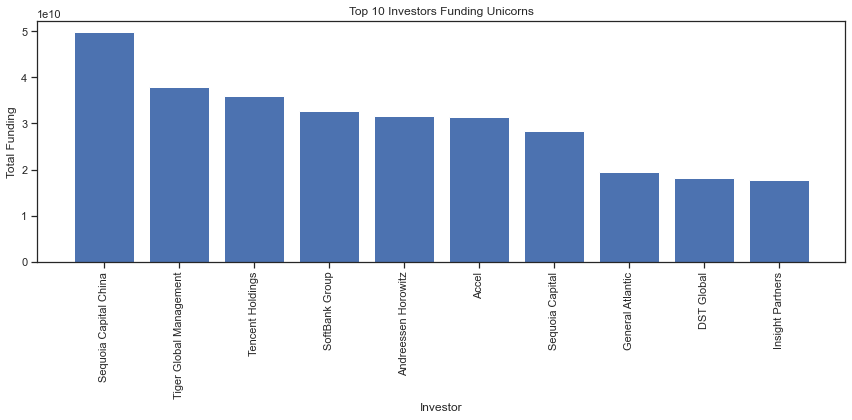

In [72]:

# Assuming you have already executed the code to create 'top_investors'

# Get the top 10 investors
top_10_investors = top_investors.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_investors['Select Investors'], top_10_investors['Funding'])
plt.xlabel('Investor')
plt.ylabel('Total Funding')
plt.title('Top 10 Investors Funding Unicorns')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


### Observation
The analysis shows the top 10 investors funding unicorn companies across the countries. The Sequoia Capital China top the list of the investors.

## Recommendation

1. Fintech companies would provide more ROI for investors and companies can leverage on location in establishing companies for profits as there would be established structure and infrastructure supporting the company.

2. Investors could also focus on other sectors (AI, Health, cybersecurity etc) that would yield ROI.

3. The funding available to companies would determine the valuation and this would enhance how long it would take to become a unicorn and not necessarily when they were established.